# Selective Sweeps

In this exercise section you will analyse positive selection in human populations. You will be looking at the X chromosome of individuals from the Simons genome diversity project. The advantage of X chromosomes in males is that they are haploid, and therefore, fully phased. Moreover, there are evidences suggesting that this chromosome has been subject to multiple hard sweeps in the evolutionary history of humans and Great Apes.

You will have data from the following populations:

| Population  | Individuals |
|-------------|:-----------:|
| Africa      |   26 males  |
| West Europe |   44 males  |
| South Asia  |   30 males  |
| East Asia   |   24 males  |

![](img/unnamed-chunk-1-1.png)

## Background material

To better understandselective sweeps, please watch and read the following:

* Two reviews explaining selective sweeps: [Szpak et al 2019](https://febs.onlinelibrary.wiley.com/doi/10.1002/1873-3468.13447) and [Wolfgang 2019](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6325696/)

* [Voight et al 2016](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.0040072) where recent positive selection is studied in humans, and a normalization procedure is introduced 

* [Skov et al 2018](https://www.biorxiv.org/content/10.1101/503995v2) where selective sweeps on X chromosome were analyzed in relation to archaic admixtures

## How to make this notebook work

* In this notebook we will use both the `command line bash` commands and `R` to setup the file folders.
* Having to shift between two languages, you need to choose a kernel every time we shift from one language to another. A kernel contains a programming language and the necessary packages to run the course material. To choose a kernel, go on the menu on the top of the page and select `Kernel --> Change Kernel`, and then select the preferred one. We will shift between two kernels, and along the code in this notebook you will see a picture telling you to change kernel. The two pictures are below:

<img src="img/bash.png" alt="Bash" width="80"> Shift to the `Bash` kernel

<img src="img/R.png" alt="R" width="80"> Shift to the `popgen course` kernel
* You can run the code in each cell by clicking on the run cell sign in the toolbar, or simply by pressing <kbd>Shift</kbd>+<kbd>Enter</kbd>. When the code is done running, a small green check sign will appear on the left side.
* You need to run the cells in sequential order to execute the analysis. Please do not run a cell until the one above is done running, and do not skip any cells
* The code goes along with textual descriptions to help you understand what happens. Please try not to focus on understanding the code itself in too much detail - but rather try to focus on the explanations and on the output of the commands 
*   You can create new code cells by pressing `+` in the Menu bar above or by pressing <kbd>B</kbd> after you select a cell. 


## Learning outcomes

At the end of this tutorial you will be able to

- **Understand and generalize** the basics of selective sweeps 
- **Apply** the normalization procedure of (Voight et al 2016) and **motivate** its usefulness
- **Perform and discuss** pairwise tests between populations
- **Study** markers of interests resulting from the sweep analysis


## Setting up folders

The data consists of **24198** SNPs from the region 73-81 Mb on the X chromosome and there is no missing data. The haplotype data for each population is found in separate files (**genotypes360\_400\_.**), whereas they use a common SNP identity file **snps360\_400\_filtered.snp**. You can find all the necessary files in the folder `haplotypes_chrX`

Here we setup a link to the `Data/haplotypes_chrX` folder

<img src="img/bash.png" alt="Bash" width="80"> Choose the `Bash` kernel


In [1]:
ln -s ../../Data/haplotypes_chrX

Package
-------

The package requires 2 inputs:

1.  The snp file (`snp_ID`, `Chromosome`, `position`, `reference allele` and `derived allele`).

2.  The haplotype file: haplotype of each individual encoded as reference allele, alternative allele and missing data N.

Analysis
--------

You will perform a genome wide scan and then focus on candidate SNPs. The package that you will be using on these analysis is `rehh`. The manual of the package can be found [here](https://cran.r-project.org/web/packages/rehh/rehh.pdf). 

### Reading in data in REHH format

In [1]:
library(rehh)

hap360_400_AF <- data2haplohh(hap_file="haplotypes_chrX/genotypes360_400_AF",
                             map_file="haplotypes_chrX/snps360_400_filtered",
                             allele_coding="map", 
                             min_perc_geno.mrk=100,
                             min_perc_geno.hap=100,
                             haplotype.in.columns=TRUE,
                             chr.name="X")

* Reading input file(s) *
Map info: 24198 markers declared for chromosome X .
Haplotype input file in transposed format assumed.
Alleles are being recoded according to fourth and fifth column of map file.
* Filtering data *
Discard haplotypes with less than 100 % of genotyped markers.
No haplotype discarded.
Discard markers genotyped on less than 100 % of haplotypes.
No marker discarded.
Data consists of 26 haplotypes and 24198 markers.
Number of mono-, bi-, multi-allelic markers:
1 2 
10018 14180 


#### Q1. How many haplotypes and snps are found in each population?

Scan the region using iHS, Rsb and XP-EHH
-----------------------------------------

You should first perform a scan for each of the regions for extreme values of integrated haplotype score (iHS). This calculation is done by standardizing to differences in allele frequency. You can do that by using the functions `scan_hh` and followed by `ihh2ihs`. Then you can visualize the results with ggplot.

#### Q2. Try also to plot a histogram of the allele frequencies of the SNPs in each population. Do you observe population differences?

Allele frequencies are calculated and stored as part of the dataframe resulted from scan\_hh. Use (par mfrow) function to combine the 4 different population plots. 

In [2]:
res.scanAF <- scan_hh(hap360_400_AF)
head(res.scanAF) # Inspect the dataframe

,CHR,POSITION,FREQ_A,FREQ_D,NHAPLO_A,NHAPLO_D,IHH_A,IHH_D,IES,INES
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X:X_73263128,X,73263128,0.00000000,1.0000000,0,26,0,NA,NA,NA
X:X_73264012,X,73264012,0.03846154,0.9615385,1,25,0,NA,NA,NA
X:X_73264487,X,73264487,0.03846154,0.9615385,1,25,0,NA,NA,NA
X:X_73264603,X,73264603,0.03846154,0.9615385,1,25,0,NA,NA,NA
X:X_73265256,X,73265256,0.00000000,1.0000000,0,26,0,NA,NA,NA
X:X_73266095,X,73266095,1.00000000,0.0000000,26,0,NA,0,NA,NA


Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘dplyr’ was built under R version 4.1.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


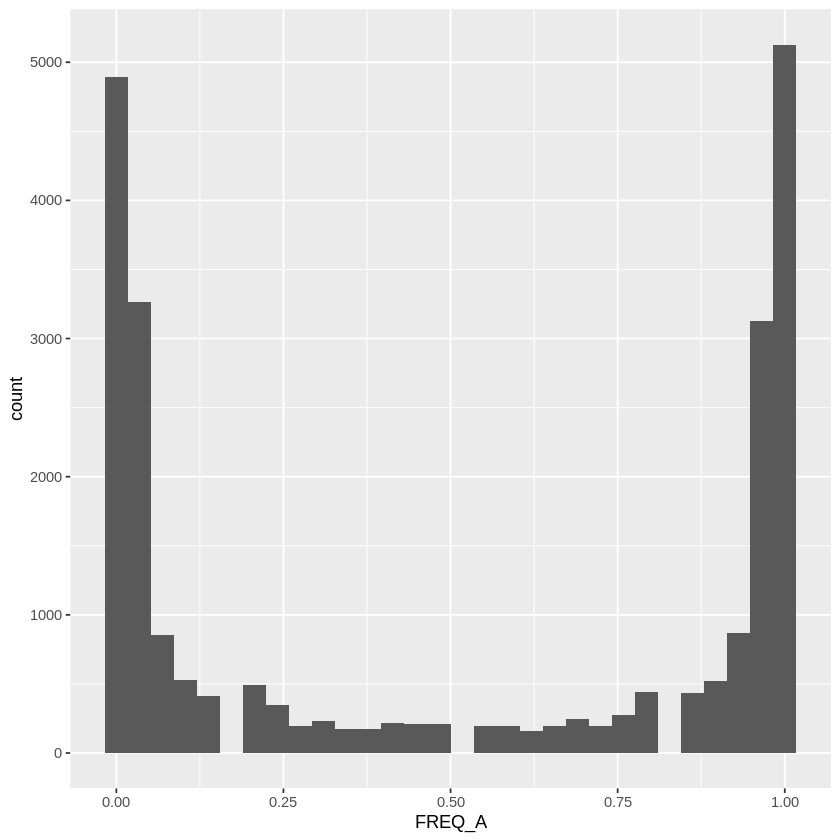

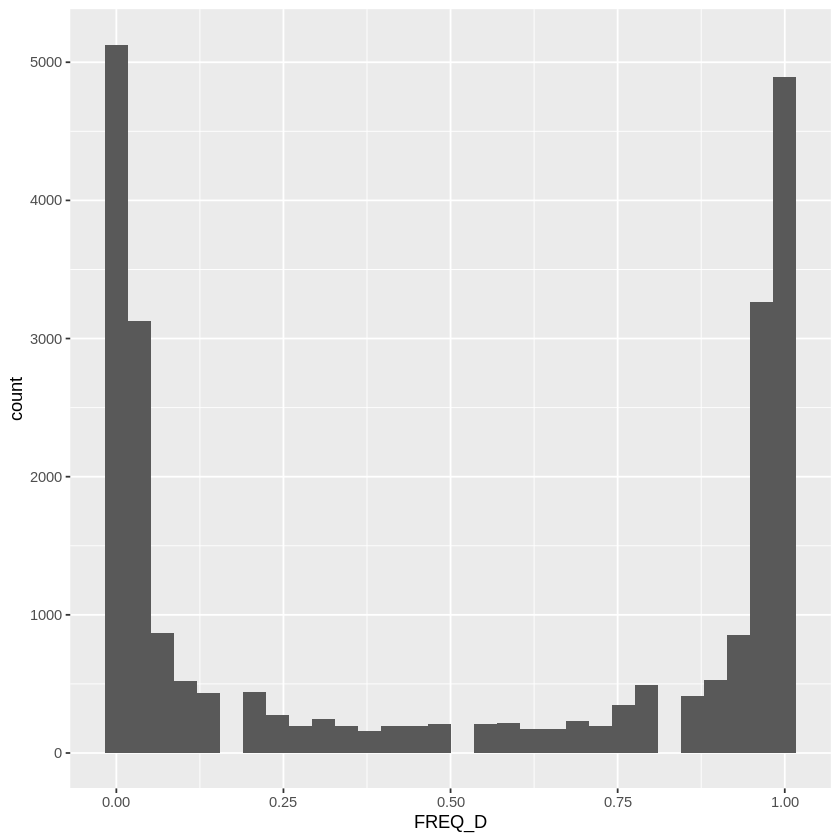

In [3]:
library(ggplot2)
library(dplyr)
res.scanAF %>% ggplot() +
  geom_histogram(aes(x=FREQ_A))
res.scanAF %>% ggplot() +
  geom_histogram(aes(x=FREQ_D))

Once you have obtained the data\_frame produced by `scan_hh` you can compute the standardized iHS (iHH), as described in [Voight et al. (2006)](http://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.0040072).

#### Q3. For what reason do they standardize iHS measure?

Discard focal markers with Minor Allele Frequency equal to or below 0.05 .
16412 markers discarded.
7786 markers remaining.


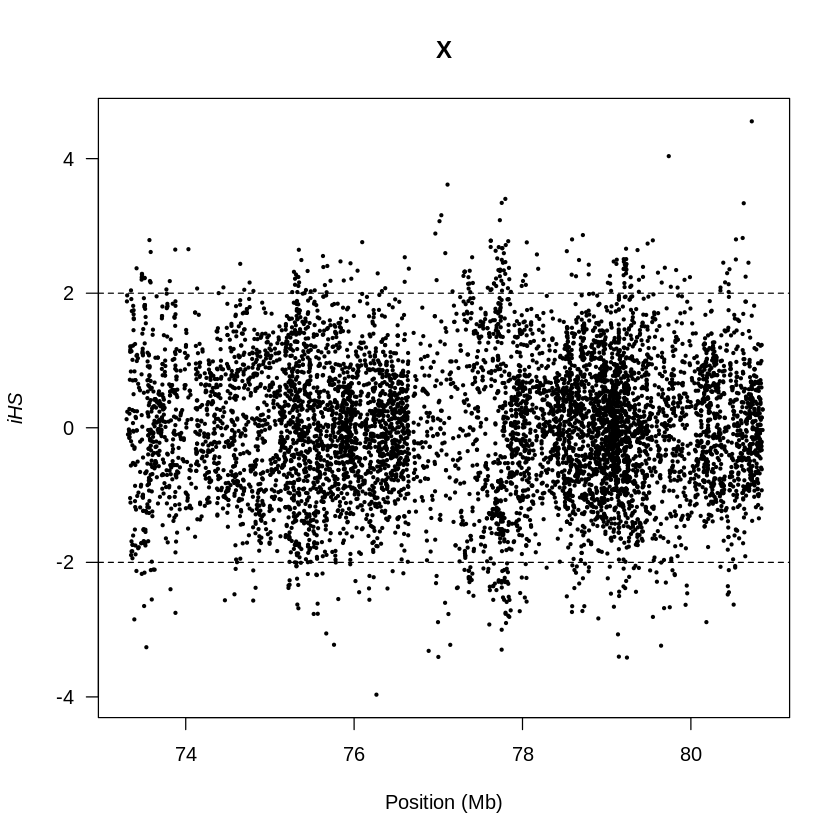

In [4]:
wg.ihsAF<-ihh2ihs(res.scanAF, freqbin = 0.05) 
manhattanplot(wg.ihsAF)

#### Q4. Do you find outliers?

If so, record the SNP positions of the most significant SNPs for later analysis, using e.g. which.max() and which.min().

Repeat the analysis for the other two populations.

In [5]:
hap360_400_WE <- data2haplohh(hap_file="haplotypes_chrX/genotypes360_400_WE",
                             map_file="haplotypes_chrX/snps360_400_filtered",
                             allele_coding="map", 
                             min_perc_geno.mrk=100,
                             min_perc_geno.hap=100,
                             haplotype.in.columns=TRUE,
                             chr.name="X")

res.scanWE<-scan_hh(hap360_400_WE)
head(res.scanWE) # Inspect the dataframe

* Reading input file(s) *
Map info: 24198 markers declared for chromosome X .
Haplotype input file in transposed format assumed.
Alleles are being recoded according to fourth and fifth column of map file.
* Filtering data *
Discard haplotypes with less than 100 % of genotyped markers.
No haplotype discarded.
Discard markers genotyped on less than 100 % of haplotypes.
No marker discarded.
Data consists of 44 haplotypes and 24198 markers.
Number of mono-, bi-, multi-allelic markers:
1 2 
13670 10528 


,CHR,POSITION,FREQ_A,FREQ_D,NHAPLO_A,NHAPLO_D,IHH_A,IHH_D,IES,INES
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X:X_73263128,X,73263128,0.00000000,1.0000000,0,44,0,NA,NA,NA
X:X_73264012,X,73264012,0.04545455,0.9545455,2,42,NA,NA,NA,NA
X:X_73264487,X,73264487,0.00000000,1.0000000,0,44,0,NA,NA,NA
X:X_73264603,X,73264603,0.00000000,1.0000000,0,44,0,NA,NA,NA
X:X_73265256,X,73265256,0.00000000,1.0000000,0,44,0,NA,NA,NA
X:X_73266095,X,73266095,1.00000000,0.0000000,44,0,NA,0,NA,NA


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


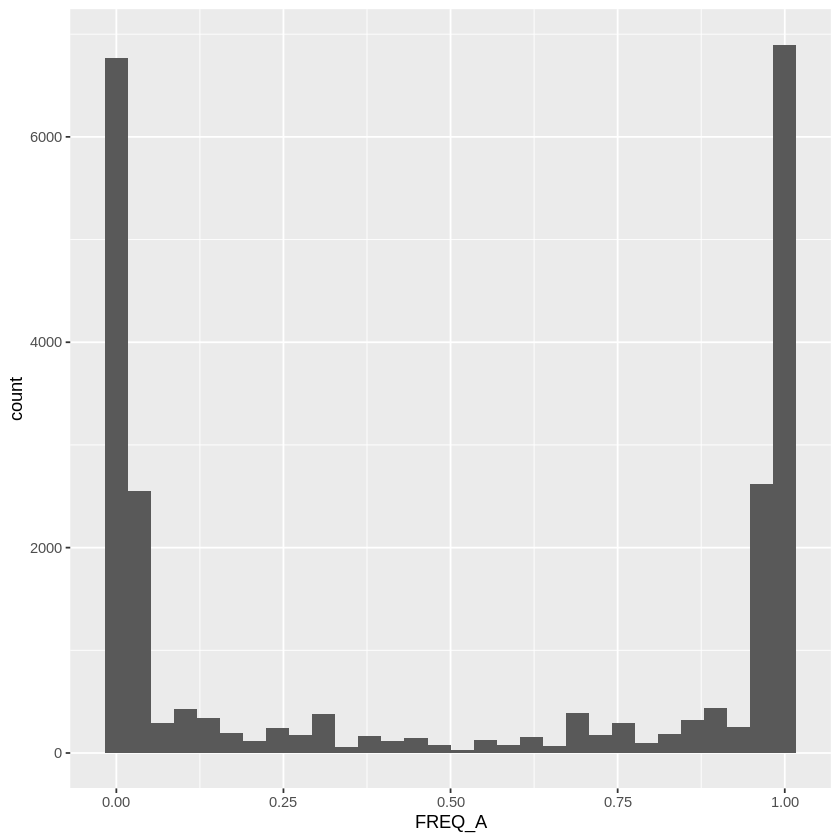

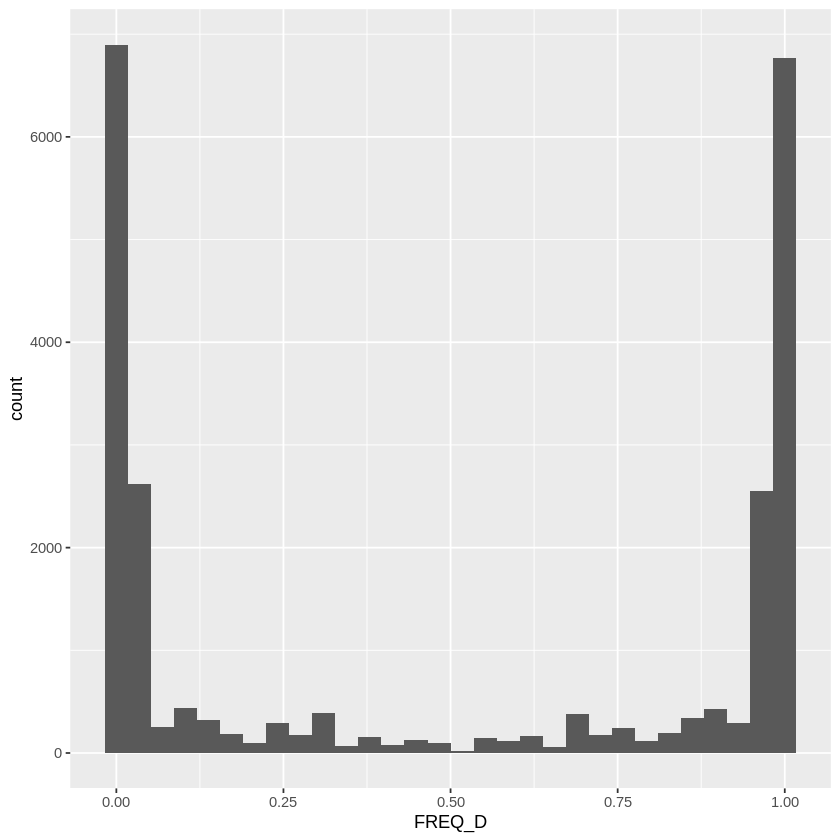

In [6]:
library(ggplot2)
library(dplyr)
res.scanWE %>% ggplot() +
  geom_histogram(aes(x=FREQ_A))
res.scanWE %>% ggplot() +
  geom_histogram(aes(x=FREQ_D))

Discard focal markers with Minor Allele Frequency equal to or below 0.05 .
18846 markers discarded.
5352 markers remaining.


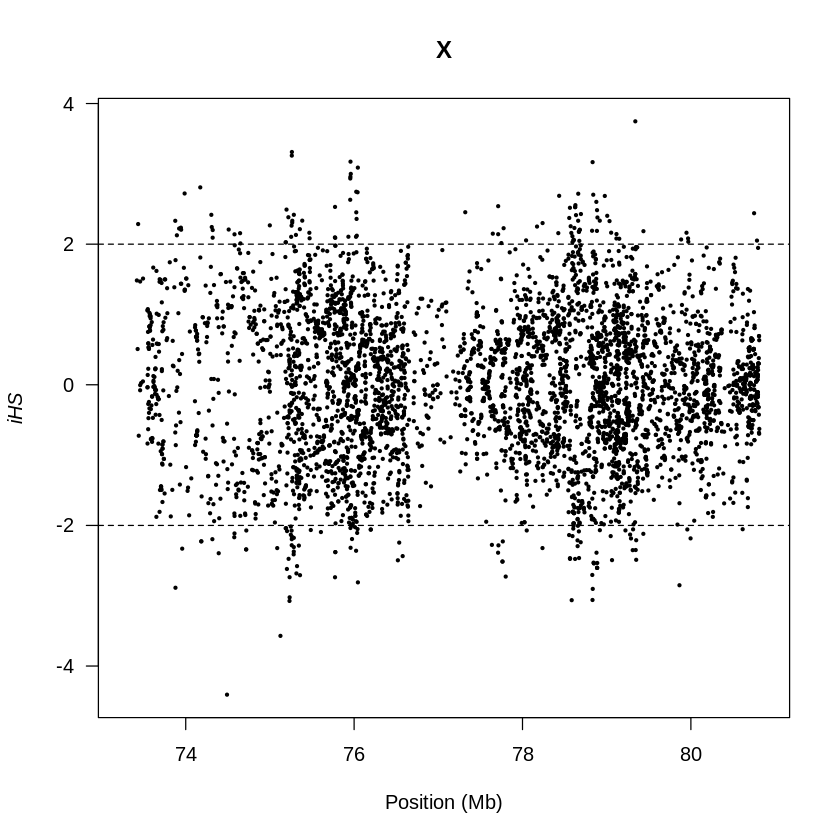

In [7]:
wg.ihsWE<-ihh2ihs(res.scanWE, freqbin = 0.05) 
manhattanplot(wg.ihsWE)


Perform pairwise population tests
---------------------------------

There are two possible functions to be used, `ies2rsb` and `ies2xpehh`, both require the dataframes of `scan_hh` class.

#### Q5. Can you see the differences between the different methods?

Scan of pop1 contains 24198 markers.
Scan of pop2 contains 24198 markers.
Merged data contains 24198 markers.


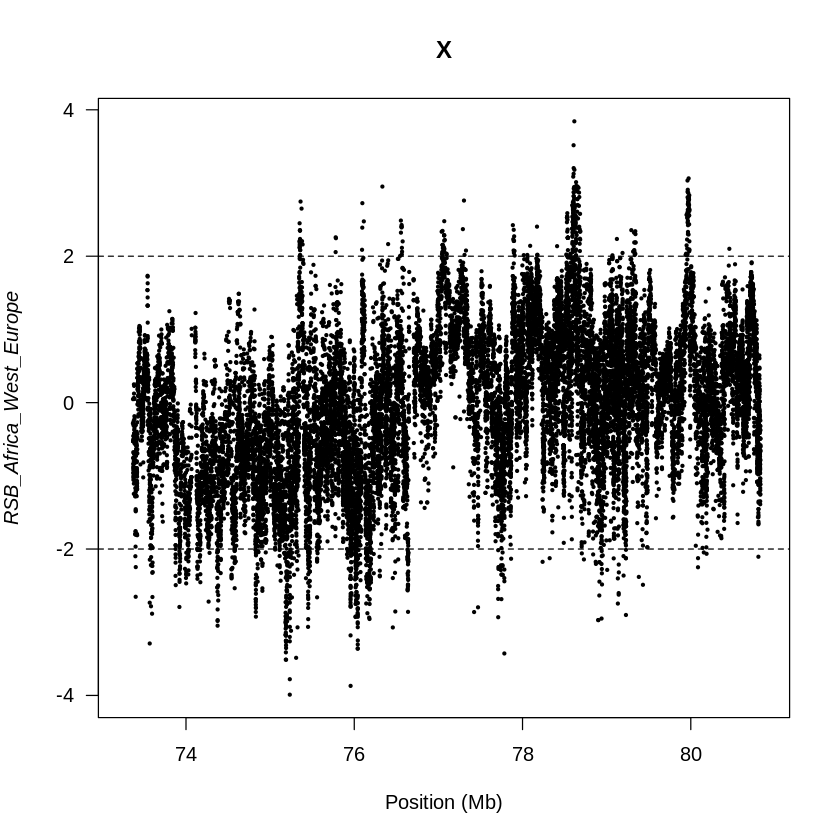

In [8]:
#?ies2rsb()
#?ies2xpehh()

# Computing ies2rsb between African population over West European population:
wg.rsbAFWE <- ines2rsb(res.scanAF,res.scanWE, popname1 = "Africa", popname2 = "West_Europe")
manhattanplot(wg.rsbAFWE)

Scan of pop1 contains 24198 markers.
Scan of pop2 contains 24198 markers.
Merged data contains 24198 markers.


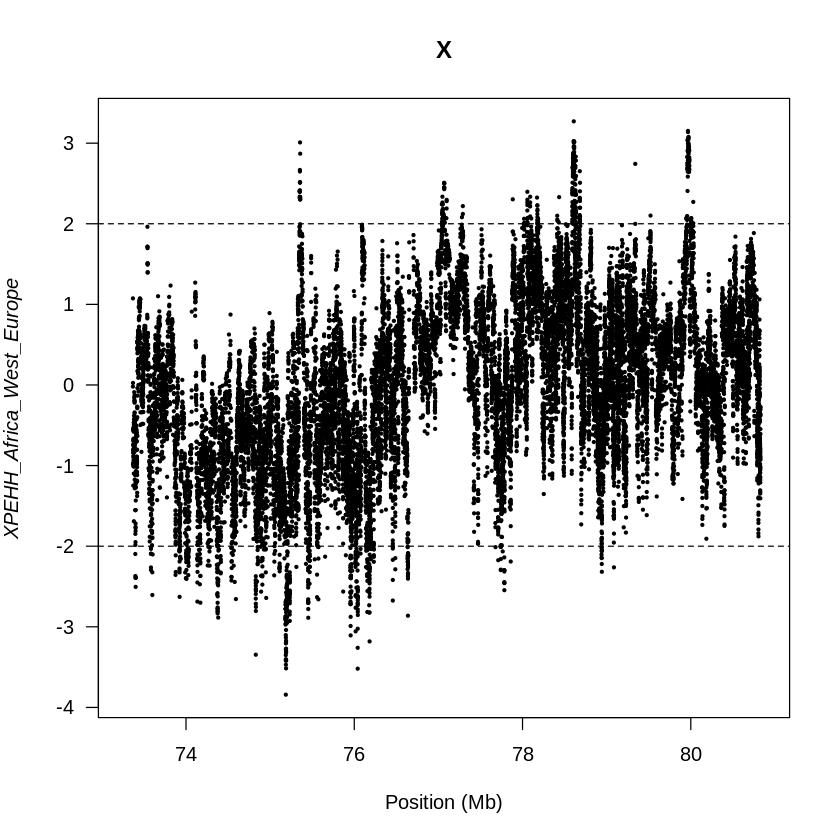

In [9]:
wg.XPEHHAFWE <- ies2xpehh(res.scanAF,res.scanWE, popname1 = "Africa", popname2 = "West_Europe")
manhattanplot(wg.XPEHHAFWE)

Zooming in on interesting markers
------------------------------

From the scan you can find SNPs that give extreme values of iES or of XPEHH for a set of populations. You can then analyse the haplotype structure around them. This is done by including the index position of the interested marker in the functions `calc_ehhs` and `bifurcation.diagram`.

Try to plot markers that show outlier values in the above statistics and compare populations. Hint: use which.max() and which.min() (especially when using XPEHH or Rsb). Select a SNP that shows some interesting results.

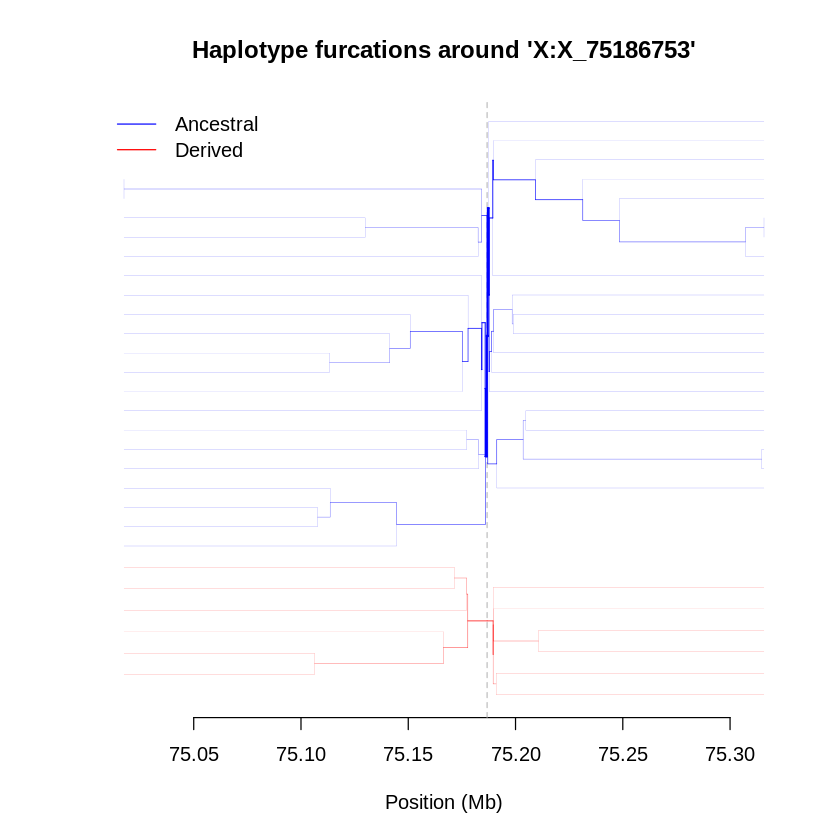

In [10]:
marker = which.min(wg.XPEHHAFWE$XPEHH_Africa_West_Europe)
snp = row.names(wg.XPEHHAFWE)[marker]
a = calc_furcation(hap360_400_AF, mrk=snp)
plot(a)


#### Q6. What is the biological function of the region around this snp?

Have a look at UCSC Genome Browser and remember that this dataset belongs to chromosome X and Hg19 as reference assembly.